### Implementation in python

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
from pathlib import Path

In [12]:
Path(__file__).parent / data / marks.csv

NameError: name '__file__' is not defined

### Initial Data Analysis

In [ ]:
pd.read_csv()

In [6]:
data = pd.read_csv('marks.csv')

In [8]:
data.head(10)

,student id,marks
0,1,95
1,2,98
2,3,92
3,4,10000
4,5,91
5,6,89
6,7,90
7,8,2000
8,9,100
9,10,100


In [47]:
data['marks'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [48]:
data.marks.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

<AxesSubplot:>

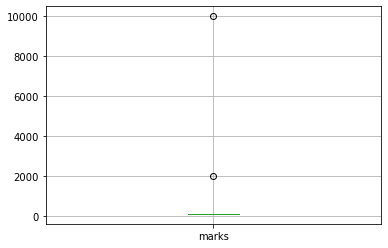

In [49]:
data[['marks']].boxplot()

array([[<AxesSubplot:title={'center':'marks'}>]], dtype=object)

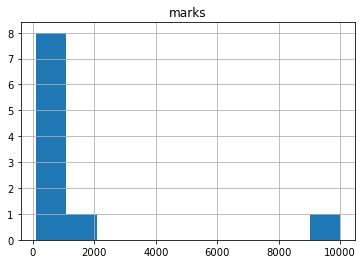

In [50]:
data[['marks']].hist()

In [51]:
data['marks'].describe()

count       10.000000
mean      1275.500000
std       3123.431028
min         89.000000
25%         91.250000
50%         96.500000
75%        100.000000
max      10000.000000
Name: marks, dtype: float64

### Learning
- Mean is skewed because of presence of outliers
- Most of the data is distributed about median
- Mean, variance based approach for outlier detection is not good
- Median based approach for outier detectinon might work better


### Developing IQR based algorithm

In [52]:
data_for_anomaly = data[['marks']]
data_for_anomaly.head()

,marks
0,95
1,98
2,92
3,10000
4,91


In [53]:
significance_multiplier = 1.5

In [54]:
significance_level = significance_multiplier
number_of_values  = len(data_for_anomaly)

In [55]:
input_for_iqr_anomaly = data_for_anomaly.marks

In [56]:
quartile_1, median, quartile_3 = np.percentile(input_for_iqr_anomaly, [25, 50,  75])

In [57]:
print(quartile_1)
print(median)
print(quartile_3)

91.25
96.5
100.0


In [70]:
iqr = quartile_3 - quartile_1
print(iqr)

8.75


In [60]:
    lower_bound = quartile_1 - (iqr * significance_level)
    upper_bound = quartile_3 + (iqr * significance_level)
    print(lower_bound)
    print(upper_bound)
    upper_anomaly_index = np.where(input_for_iqr_anomaly > upper_bound)
    lower_anomaly_index = np.where(input_for_iqr_anomaly < lower_bound)
    print(upper_anomaly_index)
    print(lower_anomaly_index)


78.125
113.125
(array([3, 7]),)
(array([], dtype=int64),)


In [61]:
data_for_anomaly

,marks
0,95
1,98
2,92
3,10000
4,91
5,89
6,90
7,2000
8,100
9,100


In [63]:
    data_for_anomaly['upper_anomaly'] = 0.0
    data_for_anomaly['lower_anomaly'] = 0.0
    data_for_anomaly['upper_anomaly'] = np.where(input_for_iqr_anomaly > upper_bound, 1.0, 0.0)
    data_for_anomaly['lower_anomaly'] = np.where(input_for_iqr_anomaly < lower_bound, -1.0, 0.0)
    

In [64]:
data_for_anomaly

,marks,upper_anomaly,lower_anomaly
0,95,0.0,0.0
1,98,0.0,0.0
2,92,0.0,0.0
3,10000,1.0,0.0
4,91,0.0,0.0
5,89,0.0,0.0
6,90,0.0,0.0
7,2000,1.0,0.0
8,100,0.0,0.0
9,100,0.0,0.0


In [65]:
    anomaly_upper_dates = data_for_anomaly[['marks']][data_for_anomaly.upper_anomaly == 1.0]
    anomaly_lower_dates = data_for_anomaly[['marks']][data_for_anomaly.lower_anomaly == -1.0]
#     print(data_for_anomaly)


In [66]:
anomaly_upper_dates

,marks
3,10000
7,2000


In [67]:
anomaly_lower_dates

,marks


In [68]:
    anomaly_detail = {'Number of Values': number_of_values, 'significance_multiplier': significance_multiplier,
                      'Lower Quartile': quartile_1, 'Median': median,
                     'Upper Quartile': quartile_3, 'Lower Limit': lower_bound, 'Upper Limit': upper_bound,
                     'Inter Quartile Range': iqr, 'upper_anomaly_index': upper_anomaly_index,
                     'lower_anomaly_index': lower_anomaly_index,
                     'anomaly_upper_dates': anomaly_upper_dates,
                     'anomaly_lower_dates': anomaly_lower_dates}

In [69]:
anomaly_detail

{'Number of Values': 10,
 'significance_multiplier': 1.5,
 'Lower Quartile': 91.25,
 'Median': 96.5,
 'Upper Quartile': 100.0,
 'Lower Limit': 78.125,
 'Upper Limit': 113.125,
 'Inter Quartile Range': 8.75,
 'upper_anomaly_index': (array([3, 7]),),
 'lower_anomaly_index': (array([], dtype=int64),),
 'anomaly_upper_dates':    marks
 3  10000
 7   2000,
 'anomaly_lower_dates': Empty DataFrame
 Columns: [marks]
 Index: []}

In [74]:
def anomaly_IQR(data_for_anomaly, significance_multiplier = 1.5):
    significance_level = significance_multiplier
    number_of_values = len(data_for_anomaly)
    input_data_for_iqr = data_for_anomaly.marks
    quartile_1, median, quartile_3 = np.percentile(input_for_iqr_anomaly, [25, 50,  75])
    mean = input_for_iqr_anomaly.mean()
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * significance_level)
    upper_bound = quartile_3 + (iqr * significance_level)
    upper_anomaly_index = np.where(input_for_iqr_anomaly > upper_bound)
    lower_anomaly_index = np.where(input_for_iqr_anomaly < lower_bound)
    data_for_anomaly['upper_anomaly'] = 0.0
    data_for_anomaly['lower_anomaly'] = 0.0
    data_for_anomaly['upper_anomaly'] = np.where(input_for_iqr_anomaly > upper_bound, 1.0, 0.0)
    data_for_anomaly['lower_anomaly'] = np.where(input_for_iqr_anomaly < lower_bound, -1.0, 0.0)
    anomaly_upper = data_for_anomaly[['student id','marks']][data_for_anomaly.upper_anomaly == 1.0]
    anomaly_lower = data_for_anomaly[['student id','marks']][data_for_anomaly.lower_anomaly == -1.0]
#     print(data_for_anomaly)
    anomaly_detail = {'Number of Values': number_of_values, 'significance_multiplier': significance_multiplier,
                      'Lower Quartile': quartile_1, 'Median': median,
                     'Upper Quartile': quartile_3, 'Lower Limit': lower_bound, 'Upper Limit': upper_bound,
                     'Inter Quartile Range': iqr, 'upper_anomaly_index': upper_anomaly_index,
                     'lower_anomaly_index': lower_anomaly_index,
                     'anomaly_upper : ': anomaly_upper,
                     'anomaly_lower : ':anomaly_lower}
    return [anomaly_detail, data_for_anomaly]
    

In [75]:
anomaly_IQR(data)

[{'Number of Values': 10,
  'significance_multiplier': 1.5,
  'Lower Quartile': 91.25,
  'Median': 96.5,
  'Upper Quartile': 100.0,
  'Lower Limit': 78.125,
  'Upper Limit': 113.125,
  'Inter Quartile Range': 8.75,
  'upper_anomaly_index': (array([3, 7]),),
  'lower_anomaly_index': (array([], dtype=int64),),
  'anomaly_upper : ':    student id  marks
  3           4  10000
  7           8   2000,
  'anomaly_lower : ': Empty DataFrame
  Columns: [student id, marks]
  Index: []},
    student id  marks  upper_anomaly  lower_anomaly
 0           1     95            0.0            0.0
 1           2     98            0.0            0.0
 2           3     92            0.0            0.0
 3           4  10000            1.0            0.0
 4           5     91            0.0            0.0
 5           6     89            0.0            0.0
 6           7     90            0.0            0.0
 7           8   2000            1.0            0.0
 8           9    100            0.0            0